# Feature Extraction

This section covers feature extraction techniques such as scaling, binarization, and transforming categorical variables into numerical ones.

# <font color='navy'>Data Processing:</font>

* Data processing  refers to the series of steps and techniques used to collect, clean, transform, and organize raw data into a usable format suitable for analysis. This process is fundamental in making data meaningful and insightful for making decisions, identifying trends, and deriving strategic insights.


# <font color='navy'>Data Integration and Feature Extraction:</font>
Feature Extraction:
> * The dataset is in raw format and there are plenty of features (i.e., variables).
> * Feature engineering is the technique of extracting more information from the existing data that you have or creating new variables that are more predictive of the outcome.



# <font color='navy'>Business Context:</font>

Let me walk you through a business example. In this case, I want to obtain insights from a **movies dataset** for an entertainment company like Netflix, Hulu, Disney, or others. The entertainment and media industries use data analysis techniques to understand audience preferences, predict trends, and make better business decisions.

For instance, in **entertainment analytics**, companies analyze streaming data to identify popular genres or predict the success of new shows. They use engagement metrics to understand viewer behavior, which helps determine which content to promote or create next.

In the context of **streaming platforms**, companies rely heavily on data to figure out which **actors** bring in the most audience engagement. They analyze viewership data to identify which actors are consistently associated with high-performing content. Metrics like how many new subscribers start watching a show because of a specific actor or how an actor's presence impacts viewer retention are essential in shaping their strategies.

Moreover, **audience feedback** plays a key role in understanding how viewers engage with different shows and movies. By analyzing this feedback, companies can identify what works and what doesn't. For example, if a particular movie gets high ratings, companies can aim to produce similar content—whether it's in the same genre, with the same actors, or with a similar screenplay.

Let’s dive into the **movies dataset** and start processing it. We’ll extract some key features because this dataset is a bit messy, with certain details like **genre** and **actors** being hidden or unstructured. I’ll walk through the process of cleaning the data and extracting valuable insights from it.


# <font color='navy'>Read Dataset:</font>

In [ ]:
# Uninstall the 'gdown' package without user confirmation
!pip uninstall gdown -y

# Install or reinstall the 'gdown' package
!pip install gdown

# Check the version of the 'gdown' package
!gdown -V


Found existing installation: gdown 5.1.0
Uninstalling gdown-5.1.0:
  Successfully uninstalled gdown-5.1.0
gdown 5.2.0 at /usr/local/lib/python3.10/dist-packages


In [ ]:
# Download the entire folder from the specified Google Drive link and save it to the current Colab session
!gdown --folder 'https://drive.google.com/drive/folders/1nsSzaVCO7x5zZQJNBvUSwONbD1bKKKtU?usp=sharing' -O '/content/'

Retrieving folder contents
Processing file 1XMKR-XMXi9f8VHWGv8oT-92Mv0p8sm7f credits.csv
Processing file 1PxosBzqF4S9EVD5WFinY3OZj7yUOmow9 keywords.csv
Processing file 173edHmZvS35nCPs4JjzlwA_WEgOWMLM_ links.csv
Processing file 1HvypvxJhMVWt4SslxOuLokP57z-UljEk movies_metadata.csv
Processing file 1qKGD-B52loyxJajFHLwMn-4Gf7cqz3_D ratings.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1XMKR-XMXi9f8VHWGv8oT-92Mv0p8sm7f
From (redirected): https://drive.google.com/uc?id=1XMKR-XMXi9f8VHWGv8oT-92Mv0p8sm7f&confirm=t&uuid=7c8bf999-b900-4f30-bf5d-67c58703e4ff
To: /content/Movies_Data/credits.csv
100% 190M/190M [00:03<00:00, 56.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PxosBzqF4S9EVD5WFinY3OZj7yUOmow9
To: /content/Movies_Data/keywords.csv
100% 6.23M/6.23M [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=173edHmZvS35nCPs4JjzlwA_WE

In [ ]:
# If you get an error stating you reach G-Drive download limit
# Download the Movies_Data from Canvas
# Upload the entire folder onto your Colab Session
# Run the code below

In [ ]:
# Import the pandas library and alias it as pd
import pandas as pd

# Read the CSV files into pandas DataFrames
data_credits = pd.read_csv('/content/Movies_Data/credits.csv')
data_keywords = pd.read_csv('/content/Movies_Data/keywords.csv')
data_links = pd.read_csv('/content/Movies_Data/links.csv')
data_metadata = pd.read_csv('/content/Movies_Data/movies_metadata.csv')
data_ratings = pd.read_csv('/content/Movies_Data/ratings.csv')


<ipython-input-3-8756ec43b248>:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_metadata = pd.read_csv('/content/Movies_Data/movies_metadata.csv')


* The datasets have the following structures and common keys for merging:

* Credits: Contains cast, crew, and id columns. The id column can serve as a common key for merging.
* Keywords: Includes id and keywords. The id column here matches the one in Credits.
* Links: Features movieId, imdbId, and tmdbId. The tmdbId corresponds to the id in both Credits and Keywords.
* Movies Metadata: Contains a wide range of columns including id, which matches with Credits and Keywords, among other descriptive data about movies.
>* Given these structures, a logical approach to combine these datasets is to merge them based on the id column (which is consistent across Credits, Keywords, and Movies Metadata), and potentially use tmdbId from the Links dataset as a connector if needed.
* Ratings dataset includes ratings per user. So we need to group by and get the average rating per movies. Then we canb merge this with the entire dataset

In [ ]:
# Convert 'id' in movies_metadata_df to int for merging (handling errors due to bad formatting)
data_metadata['id'] = pd.to_numeric(data_metadata['id'], errors='coerce')

# Convert 'id' columns in other dataframes to int for consistency
data_credits['id'] = data_credits['id'].astype(int)
data_keywords['id'] = data_keywords['id'].astype(int)

# Merge movies metadata with credits and keywords
combined_df = pd.merge(data_metadata, data_credits, on='id', how='left')
combined_df = pd.merge(combined_df, data_keywords, on='id', how='left')

# If needed, merge with links_df using 'tmdbId' as the key after renaming it to 'id'
data_links.rename(columns={'tmdbId': 'id'}, inplace=True)
combined_df = pd.merge(combined_df, data_links, on='id', how='left')

# Show the combined dataframe structure
combined_df.head()

# Calculate average rating per movie
data_avg_rating = pd.DataFrame(data_ratings.groupby('movieId')['rating'].mean()).reset_index()

# Merge average rating with the combined dataframe
combined_df = pd.merge(combined_df, data_avg_rating, on='movieId', how='left')
combined_df.head(2)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,cast,crew,keywords,movieId,imdbId,rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1,114709,3.888157
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",2,113497,3.236953


In [ ]:
# variables in the dataset
combined_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'movieId',
       'imdbId', 'rating'],
      dtype='object')

In [ ]:
# Reorder the columns in the combined dataframe with ids at the beginning
combined_df = combined_df[['id','imdb_id','movieId','imdbId', 'adult', 'belongs_to_collection',
 'budget', 'genres', 'homepage','original_language', 'original_title',
 'overview','popularity', 'poster_path', 'production_companies',
 'production_countries', 'release_date', 'revenue', 'runtime',
 'spoken_languages', 'status', 'tagline', 'title', 'video',
  'cast', 'crew', 'keywords', 'vote_count', 'vote_average', 'rating']]

# Display the first two rows of the modified dataframe
combined_df.head(2)


,id,imdb_id,movieId,imdbId,adult,belongs_to_collection,budget,genres,homepage,original_language,...,status,tagline,title,video,cast,crew,keywords,vote_count,vote_average,rating
0,862.0,tt0114709,1,114709,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,en,...,Released,NaN,Toy Story,False,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",5415.0,7.7,3.888157
1,8844.0,tt0113497,2,113497,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,en,...,Released,Roll the dice and unleash the excitement!,Jumanji,False,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",2413.0,6.9,3.236953


In [ ]:
# Look at the issues
combined_df[combined_df['id'].isna()]

,id,imdb_id,movieId,imdbId,adult,belongs_to_collection,budget,genres,homepage,original_language,...,status,tagline,title,video,cast,crew,keywords,vote_count,vote_average,rating


In [ ]:
combined_df.drop(combined_df[combined_df['id'].isna()].index, axis = 0,  inplace=True)

In [ ]:
# let's check the data types
combined_df.dtypes

id                       float64
imdb_id                   object
movieId                    int64
imdbId                     int64
adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
cast                      object
crew                      object
keywords                  object
vote_count               float64
vote_average             float64
rating                   float64
dtype: obj

In [ ]:
# cast budget revenue and popularity from object to float
combined_df['budget'] = combined_df['budget'].astype(float)
combined_df['revenue'] = combined_df['revenue'].astype(float)

In [ ]:
# Iterate over each row in the dataframe by its index
for i in range(len(combined_df)):
  try:
    # Attempt to convert the 'budget' column to float
    combined_df.loc[i, 'budget'] = float(combined_df.loc[i, 'budget'])
  except:
    # If the conversion fails, set the 'budget' value to 0
    combined_df.loc[i, 'budget'] = 0

# Ensure the 'budget' column is of type float for all rows
combined_df['budget'] = combined_df['budget'].astype(float)

# Repeat the process for the 'revenue' column
for i in range(len(combined_df)):
  try:
    # Attempt to convert the 'revenue' column to float
    combined_df.loc[i, 'revenue'] = float(combined_df.loc[i, 'revenue'])
  except:
    # If the conversion fails, set the 'revenue' value to 0
    combined_df.loc[i, 'revenue'] = 0

# Ensure the 'revenue' column is of type float for all rows
combined_df['revenue'] = combined_df['revenue'].astype(float)

# Repeat the process for the 'popularity' column
for i in range(len(combined_df)):
  try:
    # Attempt to convert the 'popularity' column to float
    combined_df.loc[i, 'popularity'] = float(combined_df.loc[i, 'popularity'])
  except:
    # If the conversion fails, set the 'popularity' value to 0
    combined_df.loc[i, 'popularity'] = 0

# Ensure the 'popularity' column is of type float for all rows
combined_df['popularity'] = combined_df['popularity'].astype(float)

In [ ]:
combined_df.dtypes

id                       float64
imdb_id                   object
movieId                  float64
imdbId                   float64
adult                     object
belongs_to_collection     object
budget                   float64
genres                    object
homepage                  object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
cast                      object
crew                      object
keywords                  object
vote_count               float64
vote_average             float64
rating                   float64
dtype: obj

# <font color='navy'>Some Simple Questions:</font>
* Which genre gets the highest average vote_average, vote_count, and rating?
* Which actors get the highest average ratings? If we are to make a movie for a specific genre which actor should we aim to hire so we can maximize the user ratings?
* Is there a relationship between keywords and ratings or budgets?
* You will not be able to answer these questions unless you process the data and obtain features like genre, cast, keywords, etc.
* Let's start processing and clean the data

# <font color='navy'>Columns with Many Missing Values:</font>
* Missing records are always an issue in datasets.
* We tend to impute the missing values.
> * Imputing means we will replace the missimng values with something else depending on the missing value type (object vs float) and business context. For example, you can replace the missing values for a variable with the median of that variable. Assume there is a variable named age. And some observations have missing values in the age column. You can compute the median age and then replace the missing values with the median value.
> * We will talk about handling missing values in the future.
* However, if the majority of data is missing (e.g., more than 50%), then imputing missing values will introduce a lot of biases. So we tend to rmeove those variables from the analysis. For instance, if the 90% of the age column is missing, then what is the point of keeping that variable in the analysis


In [ ]:
# Identify columns with a majority of missing values
maj_missing_var = []
for i in combined_df.columns:
    # Calculate the percentage of missing values in each column
    missing_percentage = combined_df[i].isnull().sum() / len(combined_df)
    # If the percentage of missing values is greater than or equal to 50%, add the column to the list
    if missing_percentage >= 0.5:
        maj_missing_var.append(i)

# Display the list of columns with a majority of missing values
maj_missing_var


['belongs_to_collection', 'homepage', 'tagline']

In [ ]:
# Drop columns with a majority of missing values from the combined dataframe
combined_df.drop(maj_missing_var, axis=1, inplace=True)

# Display the first two rows of the modified dataframe
combined_df.head(2)


,id,imdb_id,movieId,imdbId,adult,budget,genres,original_language,original_title,overview,...,spoken_languages,status,title,video,cast,crew,keywords,vote_count,vote_average,rating
0,862.0,tt0114709,1.0,114709.0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",5415.0,7.7,3.888157
1,8844.0,tt0113497,2.0,113497.0,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",2413.0,6.9,3.236953


In [ ]:
# Display the specified columns 'imdb_id', 'movieId', and 'imdbId' from the combined dataframe
combined_df[['imdb_id', 'movieId', 'imdbId']].head()
# It appears that 'movieId' is just an index starting from 1 all the way to the number of rows, which we already have this information.
# 'imdb_id' and 'imdbId' seem to contain similar information, differing only in the 'tt' prefix, indicating IMDb IDs.

,imdb_id,movieId,imdbId
0,tt0114709,1.0,114709.0
1,tt0113497,2.0,113497.0
2,tt0113228,3.0,113228.0
3,tt0114885,4.0,114885.0
4,tt0113041,5.0,113041.0


In [ ]:
# Drop the columns 'movieId' and 'imdbId' from the combined dataframe
combined_df.drop(columns=['movieId', 'imdbId'], inplace=True)

# Display the first two rows of the modified dataframe
combined_df.head(2)

,id,imdb_id,adult,budget,genres,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,title,video,cast,crew,keywords,vote_count,vote_average,rating
0,862.0,tt0114709,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",5415.0,7.7,3.888157
1,8844.0,tt0113497,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",2413.0,6.9,3.236953


# <font color='navy'>Extracting Features:</font>

* Look at the variables such as genre, production_companies,	production_countries, spoken_languages, cast,	crew,	keywords, they all within a string that looks like lists comprised of dictionaries.
* Let's get the elements from these structures

In [ ]:
# Print the first entry of the 'keywords' column in the combined dataframe
print(combined_df['production_companies'][100])

[{'name': 'Touchstone Pictures', 'id': 9195}]


In [ ]:
# Print the value of the 'crew' column in the combined dataframe for the first row
print(combined_df['crew'][0])

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

## Get genres
* We want to access the genres.
* Let's create three new columns:
> * primary genre, secondary genre, tertiary genre
* Some movies have no genres, some may have two genres, some may have three genres

## Get Production companies
* We want to access the production companies
* Let's create three new columns:
> * primary production company, secondary production company, tertiary production company
* Some movies have no production companies, some may have two production company, some may have three production companies

## Get Production countries
* We want to access the production counties
* Let's access just one country - the main country of the movie

## Get Spoken Languages
* We want to access the languages spoken
* We will access the abreviation of the spken language. Each movie will have one spoken language (primary)

## Get Cast
* We want to get the cast information
* A movie will have multiple cast members
* Let's get the first four ones assuming they are the leading actors/actresses

## Get Crew
* We want to get the primary crew such as directors and writers. You may also include producers, cameraman, etc.

## Get Keywords
* Each movie has a set of keywords, such as family, jealously, etc. We can remove the keywords and identify most popular keywords and which keywords tend to bring more revenue


In [ ]:
import ast

def get_genre_names(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    # Extract the 'name' value from each dictionary in the list
    genre_names = [genre['name'] for genre in data]
    return genre_names

In [ ]:
def get_production_names(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    # Extract the 'name' value from each dictionary in the list
    production_companies = [production_comp['name'] for production_comp in data]
    return production_companies

In [ ]:
def get_production_countries(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    # Extract the 'name' value from each dictionary in the list
    production_countries = [production_count['name'] for production_count in data]
    return production_countries

In [ ]:
def get_production_languages(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    # Extract the 'name' value from each dictionary in the list
    languages = [spoken_lan['iso_639_1'] for spoken_lan in data]
    return languages

In [ ]:
def get_cast(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    # Extract the 'name' value from each dictionary in the list
    casts = [cast_mem['name'] for cast_mem in data]
    return casts

In [ ]:
def get_director(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    try:
        # Iterate through each dictionary in the list
        for crew_member in data:
            # Check if the job of the crew member is 'director' (case-insensitive)
            if crew_member['job'].lower() == 'director':
                # Return the name of the director
                return crew_member['name']
    except:
        # If an exception occurs during the process, return 'N\A'
        return 'N\A'

In [ ]:
def get_writer(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    try:
        # Iterate through each dictionary in the list
        for crew_member in data:
            # Check if the job of the crew member matches various writer-related roles (case-insensitive)
            if crew_member['job'].lower() in ['writer', 'novel', 'screenplay', 'story', 'scenario writer', 'original story']:
                # Return the name of the writer
                return crew_member['name']
    except:
        # If an exception occurs during the process, return 'N\A'
        return 'N\A'

In [ ]:
def get_keywords(data_string):
    # Convert the string representation of the list of dictionaries into an actual list
    data = ast.literal_eval(data_string)
    # Extract the 'name' value from each dictionary in the list
    keywords = [keyword['name'] for keyword in data]
    return keywords

In [ ]:
# Create new columns in the combined dataframe to store primary, secondary, and tertiary genres
combined_df['primary genre'] = ''
combined_df['secondary genre'] = ''
combined_df['tertiary genre'] = ''

# Create new columns in the combined dataframe to store primary, secondary, and tertiary production companies
combined_df['primary production company'] = ''
combined_df['secondary production company'] = ''
combined_df['tertiary production company'] = ''

# Create new columns in the combined dataframe to store production countries and language
combined_df['production countries'] = ''
combined_df['language'] = ''

# Create new columns in the combined dataframe to store top 4 cast members
combined_df['cast1'] = ''
combined_df['cast2'] = ''
combined_df['cast3'] = ''
combined_df['cast4'] = ''

# Create new columns in the combined dataframe to store director and writer
combined_df['director'] = ''
combined_df['writer'] = ''

# Create new columns in the combined dataframe to store top 4 keywords
combined_df['keyword1'] = ''
combined_df['keyword2'] = ''
combined_df['keyword3'] = ''
combined_df['keyword4'] = ''

In [ ]:
combined_df.shape[0]

47568

In [ ]:
get_genre_names(combined_df['genres'][0])[2]

'Family'

In [ ]:
for i in range(len(combined_df)):
    try:
        # Get the primary genre and assign it to the corresponding column
        combined_df.loc[i, 'primary genre'] = get_genre_names(combined_df['genres'][i])[0]
    except:
        # If an exception occurs, assign 'N\A' to the corresponding column
        combined_df.loc[i, 'primary genre'] = 'N\A'
    try:
        # Get the secondary genre and assign it to the corresponding column
        combined_df.loc[i, 'secondary genre'] = get_genre_names(combined_df['genres'][i])[1]
    except:
        combined_df.loc[i, 'secondary genre'] = 'N\A'
    try:
        # Get the tertiary genre and assign it to the corresponding column
        combined_df.loc[i, 'tertiary genre'] = get_genre_names(combined_df['genres'][i])[2]
    except:
        combined_df.loc[i, 'tertiary genre'] = 'N\A'

    try:
        # Get the primary production company and assign it to the corresponding column
        combined_df.loc[i, 'primary production company'] = get_production_names(combined_df['production_companies'][i])[0]
    except:
        combined_df.loc[i, 'primary production company'] = 'N\A'
    try:
        # Get the secondary production company and assign it to the corresponding column
        combined_df.loc[i, 'secondary production company'] = get_production_names(combined_df['production_companies'][i])[1]
    except:
        combined_df.loc[i, 'secondary production company'] = 'N\A'
    try:
        # Get the tertiary production company and assign it to the corresponding column
        combined_df.loc[i, 'tertiary production company'] = get_production_names(combined_df['production_companies'][i])[2]
    except:
        combined_df.loc[i, 'tertiary production company'] = 'N\A'

    try:
        # Get the primary production country and assign it to the corresponding column
        combined_df.loc[i, 'primary production country'] = get_production_countries(combined_df['production_countries'][i])[0]
    except:
        combined_df.loc[i, 'primary production country'] = 'N\A'

    try:
        # Get the language and assign it to the corresponding column
        combined_df.loc[i, 'language'] = get_production_languages(combined_df['spoken_languages'][i])[0]
    except:
        combined_df.loc[i, 'language'] = 'N\A'

    try:
        # Get the first cast member and assign it to the corresponding column
        combined_df.loc[i, 'cast1'] = get_cast(combined_df['cast'][i])[0]
    except:
        combined_df.loc[i, 'cast1'] = 'N\A'
    try:
        # Get the second cast member and assign it to the corresponding column
        combined_df.loc[i, 'cast2'] = get_cast(combined_df['cast'][i])[1]
    except:
        combined_df.loc[i, 'cast2'] = 'N\A'
    try:
        # Get the third cast member and assign it to the corresponding column
        combined_df.loc[i, 'cast3'] = get_cast(combined_df['cast'][i])[2]
    except:
        combined_df.loc[i, 'cast3'] = 'N\A'
    try:
        # Get the fourth cast member and assign it to the corresponding column
        combined_df.loc[i, 'cast4'] = get_cast(combined_df['cast'][i])[3]
    except:
        combined_df.loc[i, 'cast4'] = 'N\A'

    try:
        # Get the director and assign it to the corresponding column
        combined_df.loc[i, 'director'] = get_director(combined_df['crew'][i])
    except:
        combined_df.loc[i, 'director'] = 'N\A'

    try:
        # Get the writer and assign it to the corresponding column
        combined_df.loc[i, 'writer'] = get_writer(combined_df['crew'][i])
    except:
        combined_df.loc[i, 'writer'] = 'N\A'

    try:
        # Get the first keyword and assign it to the corresponding column
        combined_df.loc[i, 'keyword1'] = get_keywords(combined_df['keywords'][i])[0]
    except:
        combined_df.loc[i, 'keyword1'] = 'N\A'
    try:
        # Get the second keyword and assign it to the corresponding column
        combined_df.loc[i, 'keyword2'] = get_keywords(combined_df['keywords'][i])[1]
    except:
        combined_df.loc[i, 'keyword2'] = 'N\A'
    try:
        # Get the third keyword and assign it to the corresponding column
        combined_df.loc[i, 'keyword3'] = get_keywords(combined_df['keywords'][i])[2]
    except:
        combined_df.loc[i, 'keyword3'] = 'N\A'
    try:
        # Get the fourth keyword and assign it to the corresponding column
        combined_df.loc[i, 'keyword4'] = get_keywords(combined_df['keywords'][i])[3]
    except:
        combined_df.loc[i, 'keyword4'] = 'N\A'


In [ ]:
# Drop the specified columns from the combined dataframe
combined_df.drop(['poster_path', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'keywords'], axis=1, inplace=True)

# Display the modified dataframe
combined_df.head()


,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,release_date,revenue,...,cast2,cast3,cast4,director,writer,keyword1,keyword2,keyword3,keyword4,primary production country
0,862.0,tt0114709,False,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,Tim Allen,Don Rickles,Jim Varney,John Lasseter,Joss Whedon,jealousy,toy,boy,friendship,United States of America
1,8844.0,tt0113497,False,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Joe Johnston,Jonathan Hensleigh,board game,disappearance,based on children's book,new home,United States of America
2,15602.0,tt0113228,False,0.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,...,Jack Lemmon,Ann-Margret,Sophia Loren,Howard Deutch,Mark Steven Johnson,fishing,best friend,duringcreditsstinger,old men,United States of America
3,31357.0,tt0114885,False,16000000.0,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,...,Angela Bassett,Loretta Devine,Lela Rochon,Forest Whitaker,Ronald Bass,based on novel,interracial relationship,single mother,divorce,United States of America
4,11862.0,tt0113041,False,0.0,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,...,Diane Keaton,Martin Short,Kimberly Williams-Paisley,Charles Shyer,Nancy Meyers,baby,midlife crisis,confidence,aging,United States of America


In [ ]:
combined_df.columns # give the colums of the dataset

Index(['id', 'imdb_id', 'adult', 'budget', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'title', 'video', 'vote_count', 'vote_average',
       'rating', 'primary genre', 'secondary genre', 'tertiary genre',
       'primary production company', 'secondary production company',
       'tertiary production company', 'production countries', 'language',
       'cast1', 'cast2', 'cast3', 'cast4', 'director', 'writer', 'keyword1',
       'keyword2', 'keyword3', 'keyword4', 'primary production country'],
      dtype='object')

# <font color='navy'>Newly Extracted Columns with Many Missing Values:</font>
* Majority blank columns: We assigned the value od N/A for the features that we could not extract,
* You can remove columns where majority is N/A
* You can keep it and use it to extract insight,
> * for instance do movies with 3 keywords do better than movies with 2 keywords
> * compare average revenue where keyword3 is N\A with movies where keyword3 is not N\A
> * This depends on your analysis.

In [ ]:
# Identify columns where the majority of values are 'N\A'
maj_missing_var = []
for i in combined_df.columns:
    # Calculate the percentage of 'N\A' values in each column
    na_percentage = (combined_df[i] == 'N\A').sum() / len(combined_df)
    # If the percentage of 'N\A' values is greater than or equal to 50%, add the column to the list
    if na_percentage >= 0.5:
        maj_missing_var.append(i)

# Display the list of columns where the majority of values are 'N\A'
maj_missing_var


['tertiary genre',
 'secondary production company',
 'tertiary production company',
 'keyword3',
 'keyword4']

In [ ]:
combined_df.drop(maj_missing_var, axis = 1, inplace = True)

In [ ]:
# get the first x observations

combined_df.head(3)

,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,release_date,revenue,...,language,cast1,cast2,cast3,cast4,director,writer,keyword1,keyword2,primary production country
0,862.0,tt0114709,False,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,...,en,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,John Lasseter,Joss Whedon,jealousy,toy,United States of America
1,8844.0,tt0113497,False,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,...,en,Robin Williams,Jonathan Hyde,Kirsten Dunst,Bradley Pierce,Joe Johnston,Jonathan Hensleigh,board game,disappearance,United States of America
2,15602.0,tt0113228,False,0.0,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,...,en,Walter Matthau,Jack Lemmon,Ann-Margret,Sophia Loren,Howard Deutch,Mark Steven Johnson,fishing,best friend,United States of America


# <font color='navy'>Release Dates:</font>

* The data contains movies since 1900s.
* However analyzing the entire dataset as a whole has some drawbacks. For instance, you want to understand how many votes each movie got and what their average vote score was.
* The problem is before 2010 or so, not many people have internet access and not many people used streaming services such as netflix.
* * So movies made in 1990s or early 2000s nmay have fewer votes and skewed review score.
* What to do then?
* Split the data into decades, and analyze the based on decade.

In [ ]:
combined_df.loc[:, 'release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
36876           NaN
36877           NaN
36878           NaN
36879           NaN
36880           NaN
Name: release_date, Length: 47568, dtype: object

In [ ]:
import numpy as np  # Import the numpy library for numerical operations

# Initialize an empty list to store years
years = []
# Loop over each row in the dataframe 'combined_df' based on its length
for i in range(len(combined_df)):
  try:
    # Attempt to extract the year from the 'release_date' column, convert to integer, and append to 'years' list
    years.append(int(combined_df.loc[i, 'release_date'].split('-')[0]))
  except:
    # If there's an error (e.g., missing or malformed data), append NaN
    years.append(np.nan)

# Initialize an empty list to store months
months = []
# Similar loop to extract months from 'release_date'
for i in range(len(combined_df)):
  try:
    # Attempt to extract the month, convert to integer, and append to 'months' list
    months.append(int(combined_df.loc[i, 'release_date'].split('-')[1]))
  except:
    # Append NaN if there's an error
    months.append(np.nan)

# Initialize an empty list to store days
days = []
# Similar loop to extract days from 'release_date'
for i in range(len(combined_df)):
  try:
    # Attempt to extract the day, convert to integer, and append to 'days' list
    days.append(int(combined_df.loc[i, 'release_date'].split('-')[2]))
  except:
    # Append NaN if there's an error
    days.append(np.nan)

# Remove the 'release_date' column from the dataframe
combined_df.drop(['release_date'], axis=1, inplace=True)
# Add the extracted 'day', 'month', and 'year' as new columns in 'combined_df'
combined_df['day'] = days
combined_df['month'] = months
combined_df['year'] = years
# Display the first two rows of the updated dataframe
combined_df.head(2)


,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,revenue,runtime,...,cast3,cast4,director,writer,keyword1,keyword2,primary production country,day,month,year
0,862.0,tt0114709,False,30000000.0,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,...,Don Rickles,Jim Varney,John Lasseter,Joss Whedon,jealousy,toy,United States of America,30.0,10.0,1995.0
1,8844.0,tt0113497,False,65000000.0,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,...,Kirsten Dunst,Bradley Pierce,Joe Johnston,Jonathan Hensleigh,board game,disappearance,United States of America,15.0,12.0,1995.0


# <font color='navy'>Insights:</font>

Obtain the following insights for movies made after 2000.
* Do movies release in a specific month tend to bring more revenue?


In [ ]:
# Filter the dataframe to include only entries where the 'year' column has values greater than 2000
df_2000 = combined_df[combined_df['year'] > 2000]

# Group the filtered dataframe by 'month' and calculate the average 'revenue' for each month
df_2000.groupby('month')['revenue'].mean()


# kids are out of school, they have no homework, an abundance of free time, send them to a movie.
# after the summer months, people start gearing up for the holidays, which gets expensive, leaving discretionary income tight.
# After the the holiday season, people are trying to catch up on credit card bills because they over spent on the holidays.

month
1.0     5.319115e+06
2.0     1.048279e+07
3.0     1.206073e+07
4.0     1.558588e+07
5.0     2.092629e+07
6.0     2.232590e+07
7.0     1.979323e+07
8.0     1.065309e+07
9.0     8.449398e+06
10.0    1.027869e+07
11.0    1.335805e+07
12.0    1.990252e+07
Name: revenue, dtype: float64

* Do particular genres bring more revenue?


In [ ]:
# Create a pivot table from the df_2000 dataframe
# This pivot table indexes by 'primary genre', calculates the average 'revenue' for each genre,
# and sorts the results by 'revenue' in descending order
df_2000.pivot_table(index='primary genre',
                    values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False)


,revenue
primary genre,
Adventure,7.131979e+07
Animation,4.044526e+07
Fantasy,3.546882e+07
Action,3.450189e+07
Family,3.438353e+07
Science Fiction,2.809353e+07
Thriller,1.050485e+07
War,1.049538e+07
Comedy,9.813702e+06


* Do particular genres have more votes?


In [ ]:
# Create a pivot table from the df_2000 dataframe
# This pivot table indexes by 'primary genre', calculates the average 'vote_count' for each genre,
# and sorts the results by 'vote_count' in descending order
df_2000.pivot_table(index='primary genre',
                    values='vote_count', aggfunc='mean').sort_values(by='vote_count', ascending=False)


,vote_count
primary genre,
Adventure,503.031746
Action,318.131853
Science Fiction,300.432099
Fantasy,293.950292
Animation,251.751950
Family,180.207483
Thriller,131.468531
Crime,131.114358
Horror,112.448755


* Do particular genres have better ratings?


In [ ]:
# Create a pivot table from the df_2000 dataframe
# This pivot table indexes by 'primary genre', calculates the average 'vote_average' for each genre,
# and sorts the results by 'vote_average' in descending order
df_2000.pivot_table(index='primary genre',
                    values='vote_average', aggfunc='mean').sort_values(by='vote_average', ascending=False)


,vote_average
primary genre,
Animation,6.256162
Foreign,5.837975
Documentary,5.802013
Music,5.789868
Drama,5.753600
War,5.704268
Adventure,5.630820
Crime,5.623761
Family,5.607143


In [ ]:
# Create a pivot table from the df_2000 dataframe
# This pivot table indexes by 'primary genre', calculates the average 'rating' for each genre,
# and sorts the results by 'rating' in descending order
df_2000.pivot_table(index='primary genre',
                    values='rating', aggfunc='mean').sort_values(by='rating', ascending=False)


,rating
primary genre,
Documentary,3.389889
Music,3.360433
History,3.197276
TV Movie,3.177110
Drama,3.159751
Animation,3.126976
War,3.082199
Family,3.078757
Romance,3.024481


* Who is the director with the highest average revenue?


In [ ]:
# Create a pivot table from the df_2000 dataframe
# This pivot table indexes by 'director', calculates the average 'revenue' for each director,
# and sorts the results by 'revenue' in descending order
df_2000.pivot_table(index='director',
                    values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False)


,revenue
director,
Lee Unkrich,1.066970e+09
Chris Miller,7.989582e+08
Peter Jackson,7.913677e+08
Tim Miller,7.831130e+08
Robert Stromberg,7.585398e+08
...,...
Holly Hardman,0.000000e+00
Homi Adajania,0.000000e+00
Hong Khaou,0.000000e+00


* Who are the cast1 through cast4 for the highest average revenue?


In [ ]:
# Create a pivot table from the df_2000 dataframe
# This pivot table indexes by 'cast1', which represents the first-listed cast member,
# calculates the average 'revenue' associated with films featuring each cast member,
# and sorts the results by 'revenue' in descending order
df_2000.pivot_table(index='cast1',
                    values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False)

,revenue
cast1,
Chris Pratt,9.048586e+08
Gal Gadot,8.205804e+08
Auli'i Cravalho,6.430345e+08
Emma Watson,6.314432e+08
Daniel Radcliffe,6.027061e+08
...,...
Hitomi Kuroki,0.000000e+00
Hitoshi Matsumoto,0.000000e+00
Hobart Bosworth,0.000000e+00


In [ ]:
df_2000[df_2000['cast1'] == 'Ellen DeGeneres']

,id,imdb_id,adult,budget,original_language,original_title,overview,popularity,revenue,runtime,...,director,writer,keyword1,keyword2,keyword3,keyword4,primary production country,day,month,year


* Is there a relationship between budget and revenue?
* Is there a relationship between budget and rating?
How about any other insights?

In [ ]:
df_2000[['budget','revenue', 'rating']].corr()

,budget,revenue,rating
budget,1.000000,0.797248,0.042305
revenue,0.797248,1.000000,0.060374
rating,0.042305,0.060374,1.000000


# Text Data Processing

In this section, we will explore how to process text data using techniques like TF-IDF Vectorization to convert text into numerical features.

# <font color='navy'>Why Do We Process Text Data:</font>

* There are many reasons why we make use of textual data:
* One of the common ones that I want to discuss here is * * Sentiment Analysis: "Sentiment analysis is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information." (Wiki)
* Sentiment analysis can be lexicon based or ML based. Recall that lexicon based sentiment analysis uses lexicons (dictionaries of words each which is assigned to an emation) and an assicated model that combines the different sentiment scores within a document. ML based sentiment analysis uses carpus with labeld data to create a classiiccation model that can be used to identify the probabilities of documents being bvelong to a particular sentiment (e.g., positive or negative).
* Why Sentiment Analysis is important? Sentiment analysis tools generate insights into how companies can enhance the customer experience and improve customer service. It is particularly important in terms of building relationships with customers and timely establish/take  corrective actions that can increase customer satisfaction and increase customer retention.

# <font color='navy'>Business Context:</font>

* We will use a customer support dataset obtained from twitter. This dataset contains tweets from customers of major brands (e.g., chipotle, southwest airlines) and the responses of these major brands' customer support teams to customers' tweets.

* There are over 3 million tweets and replies from the biggest brands on Twitter.
* The Customer Support on Twitter dataset is a large, modern corpus of tweets and replies to aid innovation in natural language understanding and conversational models, and for study of modern customer support practices and impact. In this example, we will use a subset of this data by filtering it only Chipotle
customer support.

* The link to the raw dataset is given below:

* https://www.kaggle.com/datasets/thoughtvector/customer-support-on-twitter?resource=download

* Please note that I preprocessed the dataset to only include Chipotle Tweets.

* The code I used to tweak the dataset and only include chipotle customer support is given below.

```Python
df_total = pd.read_csv("twcs.csv")

# Pick only inbound tweets that aren't in reply to anything
first_inbound = df_total[pd.isnull(df_total.in_response_to_tweet_id) & df_total.inbound]

# Merge in all tweets in response
inbounds_and_outbounds = pd.merge(first_inbound, df_total, left_on='tweet_id',
                                  right_on='in_response_to_tweet_id')

# Filter out replies not from the company
inbounds_and_outbounds = inbounds_and_outbounds[inbounds_and_outbounds.inbound_y ^ True]

df_twitter = inbounds_and_outbounds[inbounds_and_outbounds.author_id_y == 'ChipotleTweets'] # twitter data that only contains chipotle customer service
```

# <font color='navy'>Read Dataset:</font>

In [ ]:
# Run this cell
# Do not change or delete this cell
# It will read the datasets directly from the drive

import pandas as pd
import numpy as np

url_twitter = 'https://drive.google.com/file/d/1rhvaTm61u72_SVOKDu40yDt0BlA23_4D/view?usp=sharing' # link to the file
path_twitter = 'https://drive.google.com/uc?export=download&id='+url_twitter.split('/')[-2] # create the link to download the file
df_twitter = pd.read_csv(path_twitter) # read the file
df_twitter.head()


# If you have issues with reading data on G-Derive due to an error stating it reached Download Limit
# use the below code
# df_twitter = pd.read_csv('https://raw.githubusercontent.com/marineevy/datasets/main/Customer_support_data.csv')

# If you still have an issue
# Download the data and upload it on to your current Google Colab Session
# Run the code below
# df_twitter = pd.read_csv(/content/Customer_support_data.csv)


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,@ChipotleTweets @28 \nI don't fit in my Veggie...,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,@115728 I still think you look great! -Becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,@ChipotleTweets messed up today and didn’t giv...,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,@115729 I'm so sorry about that. Please tell u...
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey @ChipotleTweets wanna come to Mammoth. I'l...,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,@115730 Hopefully we'll get there at some poin...
3,115731,Tue Oct 31 20:21:10 +0000 2017,When you're the only one in costume #boorito @...,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,@115731 It's because you're smart. -Tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,@ChipotleTweets no Diet Coke and a literal bon...,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,@115732 That's incredibly concerning. Please t...


**Variable Definitiations**

*'author_id_x'*: Shows customer twitter id

*'created_at_x'*: Shows when customer tweeted

*'text_x'*: Shows customer tweet text

*'author_id_y'*: Shows customer support service (This can be sprintcare, chipotletweets DunkinDonuts, ATT, etc. I preprocessed data so we will only have Chipotle here as we are analyzing only chipotle customers.

*'created_at_y'*: Shows When customer service responded to the customer's tweet

*'text_y'*: Shows customer representative's tweet


# <font color='navy'>Convert Text into Lower case:</font>

In [ ]:
df_twitter['text_x'] = df_twitter['text_x'].str.lower() # gets the text_x column and make it all lower case in one go
df_twitter['text_y'] = df_twitter['text_y'].str.lower() # gets the text_y column and make it all lower case in one go
df_twitter.head() # displays the first five records

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,@chipotletweets @28 \ni don't fit in my veggie...,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,@115728 i still think you look great! -becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,@chipotletweets messed up today and didn’t giv...,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,@115729 i'm so sorry about that. please tell u...
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey @chipotletweets wanna come to mammoth. i'l...,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,@115730 hopefully we'll get there at some poin...
3,115731,Tue Oct 31 20:21:10 +0000 2017,when you're the only one in costume #boorito @...,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,@115731 it's because you're smart. -tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,@chipotletweets no diet coke and a literal bon...,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,@115732 that's incredibly concerning. please t...


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 18.4 MB/s eta 0:00:00


# <font color='navy'>Expensions:</font>
* To convert the sentence from "when you're the only one in costume" to "when you are the only one in costume," we simply need to expand the contraction "you're" to "you are." Here's how the sentence would look:

> * Original sentence: "when you're the only one in costume"
> * Converted sentence: "when you are the only one in costume"

* This kind of text transformation is often part of what's known as text normalization in natural language processing, where contractions are expanded to their full forms to simplify processing or increase formality in the text.

In [ ]:
import contractions  # Import the contractions library used for expanding contractions in text

def expand_all_contractions(text):
    # Expanding all contractions in the given text using the contractions.fix() function
    expanded_text = contractions.fix(text)
    return expanded_text

# Apply the expand_all_contractions function to the 'text_x' column of the df_twitter DataFrame
df_twitter['text_x'] = df_twitter['text_x'].apply(expand_all_contractions)

# Apply the expand_all_contractions function to the 'text_y' column of the df_twitter DataFrame
df_twitter['text_y'] = df_twitter['text_y'].apply(expand_all_contractions)

# Display the first few rows of the df_twitter DataFrame to check the results
df_twitter.head()


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,@chipotletweets @28 \ni do not fit in my veggi...,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,@115728 i still think you look great! -becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,@chipotletweets messed up today and did not gi...,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,@115729 i am so sorry about that. please tell ...
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey @chipotletweets want to come to mammoth. i...,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,@115730 hopefully we will get there at some po...
3,115731,Tue Oct 31 20:21:10 +0000 2017,when you are the only one in costume #boorito ...,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,@115731 it is because you are smart. -tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,@chipotletweets no diet coke and a literal bon...,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,@115732 that is incredibly concerning. please ...


# <font color='navy'>Handling Misspelled Words:</font>

In [ ]:
# this will install the autocarrect library
# !pip install autocorrect

# The code below will check all the words in all the text to autocorrect the missspellings.
# This takes some time so I commented it out.

###

# import nltk
# from autocorrect import Speller
# nltk.download('punkt')
# spell = Speller(lang='en') #we will use english for spelling

# write a funnction that will check individual words i a text and autocorrect them
# spell function does it. spell(w) means take the word w and give the correct spelling.

# def autospell(text):
  # spells = [spell(w) for w in (nltk.word_tokenize(text))]
  # return " ".join(spells)

# df_twitter['text_x'] = df_twitter['text_x'].apply(autospell)
# df_twitter['text_y'] = df_twitter['text_y'].apply(autospell)
# df_twitter.head()

###

# <font color='navy'>remove Stopwords:</font>

In [ ]:
# let's see the stopwords in the nltk library
import nltk #stop words are in Python's nltk library (natural language toolkit)
nltk.download('stopwords') # downloads the stopwords from the nltk library
from nltk.corpus import stopwords
", ".join(stopwords.words('english')) # stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
stpw = set(stopwords.words('english')) # save the stopwords in the nltk api in the variable called stpw

# write the function that will remove stopwords within a text
# it basically says if a word in the ste of stopwords, remove it from the text
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stpw])


df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: remove_stopwords(text)) # applies to above function to the text_x column
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: remove_stopwords(text)) # applies to above function to the text_y column
df_twitter.head() # displays the first five records

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,@chipotletweets @28 fit veggie burrito costume...,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,@115728 still think look great! -becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,@chipotletweets messed today give $3 burrito a...,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,@115729 sorry that. please tell us help: https...
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey @chipotletweets want come mammoth. least e...,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,@115730 hopefully get point! -becky
3,115731,Tue Oct 31 20:21:10 +0000 2017,one costume #boorito @chipotletweets,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,@115731 smart. -tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,@chipotletweets diet coke literal bone boorito...,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,@115732 incredibly concerning. please tell us ...


# <font color='navy'>Custom Word Removal:</font>

In [ ]:

# I saw that there were some text starting from http (web link).
# I thought this wont impact sentiment so I decided to remove the wpords that are link to a website.

def remove_http(text):
    return " ".join(word for word in text.split(' ') if not word.startswith('http'))

df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: remove_http(text)) # removes the words starting with http in the text_x column
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: remove_http(text)) # removes the words starting with http in the text_y column


def remove_at(text):
    return " ".join(word for word in text.split(' ') if not word.startswith('@'))

df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: remove_at(text)) # removes the words starting with @ in the text_x column
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: remove_at(text)) # removes the words starting with @ in the text_y column

def remove_chipotle(text):
    return " ".join(word for word in text.split(' ') if not word.startswith('chipotle'))

df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: remove_chipotle(text)) # removes the words starting with @ in the text_x column
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: remove_chipotle(text)) # r

df_twitter.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,fit veggie burrito costume #halloween,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,still think look great! -becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,messed today give $3 burrito although dressed 😭,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,sorry that. please tell us help: -becky
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey want come mammoth. least eat week promise,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,hopefully get point! -becky
3,115731,Tue Oct 31 20:21:10 +0000 2017,one costume #boorito,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,smart. -tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,diet coke literal bone boorito extra spooky!,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,incredibly concerning. please tell us here: -b...


# <font color='navy'>Remove Special Characters:</font>

In [ ]:
import re  # Imports the regular expressions library.

# Cleans 'text_x' by removing special characters and numbers
df_twitter['text_x'] = df_twitter['text_x'].map(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))  # Replaces non-alphanumeric characters with spaces.
df_twitter['text_x'] = df_twitter['text_x'].map(lambda x: re.sub("(?<!\d)\d{4,7}(?!\d)", "", x))  # Removes numbers 4 to 7 digits long that are not part of longer numbers.
df_twitter['text_x'] = df_twitter['text_x'].str.replace('\d+', '', regex=True)  # Removes all remaining numbers.

# Cleans 'text_y' by removing special characters and numbers
df_twitter['text_y'] = df_twitter['text_y'].map(lambda x: re.sub('[^A-Za-z0-9]', ' ', x))  # Replaces non-alphanumeric characters with spaces.
df_twitter['text_y'] = df_twitter['text_y'].map(lambda x: re.sub("(?<!\d)\d{4,7}(?!\d)", "", x))  # Removes numbers 4 to 7 digits long that are not part of longer numbers.
df_twitter['text_y'] = df_twitter['text_y'].str.replace('\d+', '', regex=True)  # Removes all remaining numbers.

df_twitter.head()  # Displays the first five rows of the dataframe to verify the cleaning operations.


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,fit veggie burrito costume halloween,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,still think look great becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,messed today give burrito although dressed,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,sorry that please tell us help becky
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey want come mammoth least eat week promise,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,hopefully get point becky
3,115731,Tue Oct 31 20:21:10 +0000 2017,one costume boorito,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,smart tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,diet coke literal bone boorito extra spooky,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,incredibly concerning please tell us here b...


# <font color='navy'>Remove Punctuations:</font>

In [ ]:

import string # import the string library

pnctns = string.punctuation # save the punctuations in the string librry in the variable called punctations.
pnctns = pnctns+'’' # I also addedd curly apostrophe as this was not on the list.

# below function will take the text, relace the punctuatons with '', which is nothing. (e.g. don't becomes dont)

def remove_punct(text):
    return text.translate(str.maketrans('', '', pnctns))

df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: remove_punct(text)) # we apply the above function to the text_x column
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: remove_punct(text)) # we apply the above function to the text_y column
df_twitter.head() # displays the first five records.

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,fit veggie burrito costume halloween,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,still think look great becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,messed today give burrito although dressed,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,sorry that please tell us help becky
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey want come mammoth least eat week promise,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,hopefully get point becky
3,115731,Tue Oct 31 20:21:10 +0000 2017,one costume boorito,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,smart tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,diet coke literal bone boorito extra spooky,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,incredibly concerning please tell us here b...


# <font color='navy'>Word Stemming:</font>
Stemming and lemmatization are text preprocessing techniques in natural language processing (NLP). Specifically, they reduce the inflected forms of words across a text data set to one common root word or dictionary form, also known as a “lemma” in computational linguistics.

![Imgur](https://imgur.com/fct898Xl.png)

* Lemmatisation is closely related to stemming. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

* The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.
The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.

In [ ]:
!pip install wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize('cars'))
print(lemmatizer.lemmatize('leaves'))
print(lemmatizer.lemmatize('developed'))

car
leaf
developed


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('cars'))
print(stemmer.stem('leaves'))
print(stemmer.stem('developed'))

car
leav
develop


In [ ]:
# Import necessary libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into a single sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence


df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: lemmatize_sentence(text))
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: lemmatize_sentence(text))
df_twitter.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,fit veggie burrito costume halloween,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,still think look great becky
1,115729,Tue Oct 31 22:03:32 +0000 2017,messed today give burrito although dressed,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,sorry that please tell u help becky
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey want come mammoth least eat week promise,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,hopefully get point becky
3,115731,Tue Oct 31 20:21:10 +0000 2017,one costume boorito,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,smart tara
4,115732,Tue Oct 31 22:01:40 +0000 2017,diet coke literal bone boorito extra spooky,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,incredibly concerning please tell u here becky


In [ ]:
# Import necessary libraries
'''
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')

# Function to stem words in a sentence
def stem_sentence(sentence):
    stemmer = PorterStemmer()
    # Tokenize the sentence into words
    words = word_tokenize(sentence)
    # Stem each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a single sentence
    stemmed_sentence = ' '.join(stemmed_words)
    return stemmed_sentence

df_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: stem_sentence(text))
df_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: stem_sentence(text))
df_twitter.head()
'''

"\nimport nltk\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import word_tokenize\n\n# Ensure that necessary NLTK resources are downloaded\nnltk.download('punkt')\n\n# Function to stem words in a sentence\ndef stem_sentence(sentence):\n    stemmer = PorterStemmer()\n    # Tokenize the sentence into words\n    words = word_tokenize(sentence)\n    # Stem each word\n    stemmed_words = [stemmer.stem(word) for word in words]\n    # Join the stemmed words back into a single sentence\n    stemmed_sentence = ' '.join(stemmed_words)\n    return stemmed_sentence\n\ndf_twitter['text_x'] = df_twitter['text_x'].apply(lambda text: stem_sentence(text))\ndf_twitter['text_y'] = df_twitter['text_y'].apply(lambda text: stem_sentence(text))\ndf_twitter.head()\n"

# <font color='navy'>Get Insights:</font>

In [ ]:
all_tweets = ''  # Initialize an empty string to store all tweets concatenated together.

# Loop through each row in the df_twitter DataFrame
for i in range(0, len(df_twitter)):
    all_tweets = all_tweets + ' ' + df_twitter['text_x'][i]  # Concatenate the text from the 'text_x' column to the 'all_tweets' string.

all_tweets  # Displays the concatenated string containing all tweets.


' fit veggie burrito costume halloween messed today give burrito although dressed hey want come mammoth least eat week promise one costume boorito diet coke literal bone boorito extra spooky happy halloween since old trick treat look forward booritos got mine earlier you frustrated ordered dinner saturday using app order wrong charged credit card twice way giving burrito dress halloween call make sure select one dress still qualify boorito every year trick or treating routine walking spending dollar walking back home nasty used napkin someone food burrito nowhere near considering walking llama onesie alone happy halloween name better halloween duo speedwaybrick uttranscript forget cop burrito today thanks burrito bowl halloweentreats know boy ordered half bowl wherestherice getting buck burrito becoming tradition halloween thebest shoutout deal nothing respect boorito thanks burrito bowl tonight going expecting boorito w o wearing costume like going trick treating w o costume amp expec

## <font color='maroon'>Most Common Words:</font>

In [ ]:
import nltk  # Import the Natural Language Toolkit library if not already imported

tweet_dist = nltk.FreqDist(all_tweets.split())  # Create a frequency distribution of all words in 'all_tweets'
tweet_dist.most_common(15)  # Retrieve the 15 most common words in the frequency distribution


[('burrito', 1603),
 ('queso', 1393),
 ('get', 1372),
 ('bowl', 1331),
 ('order', 1071),
 ('time', 995),
 ('got', 915),
 ('like', 805),
 ('food', 751),
 ('chip', 724),
 ('today', 680),
 ('love', 662),
 ('day', 579),
 ('one', 570),
 ('guac', 554)]

In [ ]:
!pip install wordcloud

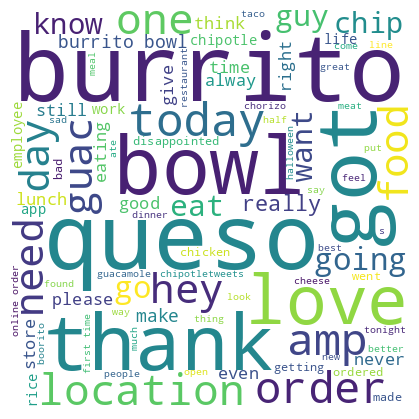

In [ ]:
import wordcloud  # Import the wordcloud library for visualizing text data
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for plotting

# Create a WordCloud object with specific dimensions and settings
wc = wordcloud.WordCloud(width=400, height=400,
                         background_color='white',
                         min_font_size=10).generate(all_tweets)  # Generate a word cloud using the 'all_tweets' string

# Set up a matplotlib figure with specified size and facecolor
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wc)  # Display the generated word cloud image
plt.axis("off")  # Turn off the axis labels and ticks
plt.tight_layout(pad=0)  # Adjust the layout to ensure the plot has no extra padding
plt.show()  # Show the plot


## <font color='maroon'>Sentiments:</font>

In [ ]:
!pip install vaderSentiment # install the vader library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import vaderSentiment # imports the vader library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # imports the sentiment intensity analyzer from the vader library

sentiment_analyzer = SentimentIntensityAnalyzer() # creates a SentimentIntensityAnalyzer object
# for each text(row) in the text_x column, we calcualte the sentiments using the sentiment_analyzer.polarity_scores(text) code
# this will send multiple values, such as positive negative, neutral and compound. Compound ranges from -1 to 1.
# It is the combination of all the emotions/ Closer to -1 the more  negative the sentiment is.

df_twitter['sentiment_x'] = df_twitter['text_x'].apply(lambda text: sentiment_analyzer.polarity_scores(text)['compound']) #
df_twitter['sentiment_y'] = df_twitter['text_y'].apply(lambda text: sentiment_analyzer.polarity_scores(text)['compound'])
df_twitter.head()

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y,sentiment_x,sentiment_y
0,115728,Tue Oct 31 22:03:38 +0000 2017,fit veggie burrito costume halloween,ChipotleTweets,Tue Oct 31 22:14:28 +0000 2017,still think look great becky,0.3612,0.6249
1,115729,Tue Oct 31 22:03:32 +0000 2017,messed today give burrito although dressed,ChipotleTweets,Tue Oct 31 22:14:00 +0000 2017,sorry that please tell u help becky,-0.3400,0.5719
2,115730,Tue Oct 31 22:03:06 +0000 2017,hey want come mammoth least eat week promise,ChipotleTweets,Tue Oct 31 22:13:29 +0000 2017,hopefully get point becky,0.3818,0.4019
3,115731,Tue Oct 31 20:21:10 +0000 2017,one costume boorito,ChipotleTweets,Tue Oct 31 20:37:31 +0000 2017,smart tara,0.0000,0.4019
4,115732,Tue Oct 31 22:01:40 +0000 2017,diet coke literal bone boorito extra spooky,ChipotleTweets,Tue Oct 31 22:11:38 +0000 2017,incredibly concerning please tell u here becky,0.0000,0.3774


In [ ]:
# get the year from created_at_x
df_twitter['day'] = pd.DatetimeIndex(df_twitter['created_at_x']).day
df_twitter['month'] = pd.DatetimeIndex(df_twitter['created_at_x']).month
df_twitter['year'] = pd.DatetimeIndex(df_twitter['created_at_x']).year

In [ ]:
# How many tweets with negative sentiments
df_twitter[df_twitter['sentiment_x'] < 0].shape[0]

4033

In [ ]:
# sentiment over dates
df_twitter[((df_twitter.year == 2017) & (df_twitter.month == 10))].groupby(['day'])['sentiment_x'].mean().sort_values(ascending=True)


day
1    -0.520200
2    -0.476700
24    0.003719
6     0.017478
28    0.017794
14    0.022161
11    0.023271
7     0.026036
29    0.026568
23    0.027806
13    0.037717
19    0.037945
8     0.046100
15    0.052860
17    0.058978
12    0.060605
20    0.062736
27    0.063591
9     0.065095
5     0.065230
22    0.070064
10    0.075545
25    0.080909
4     0.082348
16    0.083907
21    0.107126
31    0.110336
30    0.110392
26    0.114165
18    0.152341
3     0.187362
Name: sentiment_x, dtype: float64

In [ ]:
# sentiment over dates
df_twitter[((df_twitter.year == 2017) & (df_twitter.month == 11))].groupby(['day'])['sentiment_x'].mean().sort_values(ascending=True)


day
18   -0.017063
25   -0.012564
13    0.014721
2     0.022405
5     0.024071
19    0.033329
11    0.036890
6     0.040666
4     0.042670
12    0.043901
7     0.048410
3     0.049677
10    0.049766
14    0.056185
28    0.056657
30    0.059360
24    0.065348
9     0.069349
20    0.077554
17    0.078437
16    0.080082
23    0.085979
27    0.087623
29    0.089077
15    0.092552
21    0.094770
26    0.111628
8     0.120637
22    0.131155
1     0.138406
Name: sentiment_x, dtype: float64

# <font color='navy'>Create tdm/tf-idf:</font>

* A Term Document Matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In this matrix, rows correspond to terms in the documents, and columns correspond to the documents themselves.

* Suppose you have two documents:

> * Document 1: "Cat eats fish."
> * Document 2: "Dog eats meat."
* The term document matrix might look something like this:
* ![Imgur](https://imgur.com/vpjTGnC.png)

* TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.
* The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.
* TF-IDF is composed of two terms:
> * Term Frequency (TF), which measures how frequently a term occurs in a document.
> * Inverse Document Frequency (IDF), which measures how important a term is within the document set.

* Continuing with the previous example:

> * TF ("eats", Document 1) = Number of times "eats" appears in Document 1 / Total number of terms in Document 1 = 1/3
> * IDF ("eats", Documents) = log(Total number of documents / Number of documents containing "eats") = log(2/2) = 0 (since "eats" appears in both documents, its IDF is 0, indicating it's not a unique term)
> * Therefore, TF-IDF for "eats" in Document 1 would be 1/3 * 0 = 0. The TF-IDF value reflects that "eats" isn't uniquely significant across the set of documents, despite its presence.

* TF-IDF helps in identifying the most relevant words in a set of documents, filtering out common terms like "the", "is", and others that might appear frequently but have little importance. This makes it extremely useful for document classification, clustering, and information retrieval systems.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df_twitter['text_x']
vectorizer = CountVectorizer()
dtm_x = vectorizer.fit_transform(corpus)

In [ ]:
dtm = pd.DataFrame(dtm_x.todense(), columns = vectorizer.get_feature_names_out())

In [ ]:
df_twitter['text_x']

0                     fit veggie burrito costume halloween
1               messed today give burrito although dressed
2             hey want come mammoth least eat week promise
3                                      one costume boorito
4              diet coke literal bone boorito extra spooky
                               ...                        
13848    wonder start paying advertise them happy hallo...
13849                         thank heaven bowl three buck
13850                                            ready you
13851    today walked order chorizo burrito come find o...
13852       even try inhale burrito still go like min life
Name: text_x, Length: 13853, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df_twitter['text_x']
vectorizer = TfidfVectorizer()
tfidf_x = vectorizer.fit_transform(corpus)

In [ ]:
tfidf_x_df = pd.DataFrame(tfidf_x.todense(), columns = vectorizer.get_feature_names_out())
tfidf_x_df.head()

,aaaaaahhhmaaaazzing,aarhus,ab,abandoned,abdullah,ability,able,abomination,abort,about,...,zac,zach,zales,zealand,zero,zest,zip,zone,zoo,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_twitter['text_x']

0                     fit veggie burrito costume halloween
1               messed today give burrito although dressed
2             hey want come mammoth least eat week promise
3                                      one costume boorito
4              diet coke literal bone boorito extra spooky
                               ...                        
13848    wonder start paying advertise them happy hallo...
13849                         thank heaven bowl three buck
13850                                            ready you
13851    today walked order chorizo burrito come find o...
13852       even try inhale burrito still go like min life
Name: text_x, Length: 13853, dtype: object

In [ ]:
tfidf_x_df[tfidf_x_df['abandoned']>0]

,aaaaaahhhmaaaazzing,aarhus,ab,abandoned,abdullah,ability,able,abomination,abort,about,...,zac,zach,zales,zealand,zero,zest,zip,zone,zoo,zumba
7510,0.0,0.0,0.0,0.390027,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

This final section covers data cleaning techniques such as handling missing values, encoding categorical variables, and other preprocessing steps.

# <font color='navy'>Data Processing:</font>

In [ ]:
import pandas as pd

# Using the direct link to the file

# Read the CSV file using Pandas (pd)
url = 'https://drive.google.com/file/d/1AOceeQ7kCbyMXb8dE72tkVhRPt_UH3Y4/view?usp=sharing'

# Extracting the file ID from the URL
file_id = url.split('/')[-2]

# Constructing the download link for the file
download_link = 'https://drive.google.com/uc?export=download&id=' + file_id

# Reading the CSV file from the provided link
df = pd.read_csv(download_link)

# only use the below code if you reach download limit on G-Drive
# df = pd.read_csv('https://raw.githubusercontent.com/marineevy/datasets/main/telco_churn.csv')

# only use the below code if you cannot load the data using previous two methods
# df = pd.read_csv('/content/telco_churn.csv')

df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Sentiment,Feedback Date
0,07882-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,The service is decent but still figuring out i...,Neutral,2019-02-18 21:04:18.439154223
1,15062-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Very pleased with the reliability and cost-eff...,Positive,2023-04-09 09:22:20.288316155


In [ ]:
# Prints the first x records
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Sentiment,Feedback Date
0,07882-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,The service is decent but still figuring out i...,Neutral,2019-02-18 21:04:18.439154223
1,15062-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,Very pleased with the reliability and cost-eff...,Positive,2023-04-09 09:22:20.288316155


In [ ]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
Customer Feedback     object
Sentiment             object
Feedback Date         object
dtype: object

In [ ]:
# Change the data type of the 'SeniorCitizen' column in the DataFrame 'df' to 'object'
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# <font color='navy'>Data Transformation: Normalization/Scaling:</font>

In [ ]:
# Extracts the numerical values
# if this is a regression or classification and if there is a target variable,
# you need to remove that from the variable list so you will not change its values
# if target variable is numerical, remove it from the numerical variables
# otherwise remove it from the categorical variables
# target is churn and it is yes and no

# Define the name of the target variable, although it's not used in the rest of this snippet
target = 'Churn'

# Select columns from the DataFrame 'df' that are of numeric data types (integer and float)
# and store these column names in the 'numerical_variables' variable
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Print the names of the numerical variables
print(numerical_variables)


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


## <font color='maroon'>Data Transformation: Scaling:</font>

In [ ]:
# imports the preprocessing library
from sklearn import preprocessing

# converts pandas df to numpy array
array = df[numerical_variables].values

# creates a min max scaler
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scales the data and overwrites it into the existing dataframe
df[numerical_variables] = pd.DataFrame(data_scaler.fit_transform(array),
                                 columns = numerical_variables)

# Returns the first x records
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Sentiment,Feedback Date
0,07882-VHVEG,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No,The service is decent but still figuring out i...,Neutral,2019-02-18 21:04:18.439154223
1,15062-GNVDE,Male,0,No,No,0.472222,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,0.385075,0.215867,No,Very pleased with the reliability and cost-eff...,Positive,2023-04-09 09:22:20.288316155


## <font color='maroon'>Data Transformation: Normalization:</font>

In [ ]:
# Imports the StandardScaler module from sklearn
from sklearn import preprocessing

# Converts pandas df to numpy array
array = df[numerical_variables].values

# Creates standarization instance
data_scaler = preprocessing.StandardScaler()

# Standardize the numerical variables
df[numerical_variables] = pd.DataFrame(data_scaler.fit_transform(array),
                                 columns = numerical_variables)

# Extracts the first x records
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Sentiment,Feedback Date
0,07882-VHVEG,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994194,No,The service is decent but still figuring out i...,Neutral,2019-02-18 21:04:18.439154223
1,15062-GNVDE,Male,0,No,No,0.066327,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,-0.259629,-0.173740,No,Very pleased with the reliability and cost-eff...,Positive,2023-04-09 09:22:20.288316155


# <font color='navy'>Handling Missing Data:</font>

In [ ]:
# Checks the number of missing values by column
[sum(df[i].isnull()) for i in df.columns]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0]

In [ ]:
# extracts the numerical and categorical values
# if this is a regression or classification and if there is a target variable,
# you need to remove that from the variable list
# we are not supposed to impute the target variable
# if there is a missing variable in the target variable
# we remove that observation

# Select columns from the DataFrame 'df' that are of numeric data types (integer and float)
# and store these column names in the 'numerical_variables' variable
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns

# Select columns from the DataFrame 'df' that are of the object data type (typically strings or mixed types)
# and store these column names in the 'categorical_variables' variable
categorical_variables = df.select_dtypes(include=['object']).columns

# Remove specific columns from the 'categorical_variables' list that are not needed for further analysis
# In this case, 'Churn', 'Customer Feedback', 'Feedback Date', and 'customerID' are being dropped
categorical_variables = categorical_variables.drop(['Churn', 'Customer Feedback', 'Feedback Date', 'customerID'])

# Print the names of the numerical variables
print(numerical_variables)

# Print the names of the remaining categorical variables after removal of specified columns
print(categorical_variables)


Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Sentiment'],
      dtype='object')


In [ ]:
# Loop through each column name in 'numerical_variables'
for i in numerical_variables:
    # Check if the proportion of missing values in the column is greater than 50%
    if df[i].isna().sum() / len(df) > 0.5:
        # If more than 50% of the data in the column is missing, drop the column from the DataFrame
        df.drop(i, axis=1, inplace=True)
    else:
        # If less than 50% of the data is missing, fill the missing values with the median of the column
        # Note: inplace=False in fillna means the method returns a new Series with the missing values filled,
        # which is then assigned back to the column in the DataFrame.
        df[i] = df[i].fillna(df[i].median(), inplace=False)


In [ ]:
# Fills in the missing values in numerical columns with mode
# and overwrites the result into the esxisting dataset
# Loop through each column name in 'categorical_variables'

for i in categorical_variables:
    # Check if the proportion of missing values in the column exceeds 50%
    if df[i].isna().sum() / len(df) > 0.5:
        # If more than 50% of the data in the column is missing, drop the column from the DataFrame
        df.drop(i, axis=1, inplace=True)
    else:
        # If less than 50% of the data is missing, fill the missing values with the mode of the column
        # The mode is the most frequently occurring value in the column
        # 'mode()[0]' is used to select the first mode in case there are multiple modes
        # Note: inplace=False in fillna means the method returns a new Series with the missing values filled,
        # which is then assigned back to the column in the DataFrame.
        df[i] = df[i].fillna(df[i].mode()[0], inplace=False)


In [ ]:
# Checks the number of missing values by column
[sum(df[i].isnull()) for i in df.columns]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# <font color='navy'>Feature Engineering: Encoding Catgeorical Variables:</font>

In [ ]:
# Prints the first five records
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Sentiment,Feedback Date
0,07882-VHVEG,Female,0,Yes,No,-1.277445,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,-1.160323,-0.994194,No,The service is decent but still figuring out i...,Neutral,2019-02-18 21:04:18.439154223
1,15062-GNVDE,Male,0,No,No,0.066327,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,-0.259629,-0.173740,No,Very pleased with the reliability and cost-eff...,Positive,2023-04-09 09:22:20.288316155


In [ ]:
# extracts the numerical and categorical values
# if this is a regression or classification and if there is a target variable,
# you need to remove that from the variable list
# We do not want to create new variables for the below categorical variables

# Select columns in the DataFrame 'df' that have a data type of 'object' (usually strings or mixed types)
# and store these column names in 'categorical_variables'
categorical_variables = df.select_dtypes(include=['object']).columns

# Remove specific columns from 'categorical_variables' that are not needed for further analysis
# This is often done to exclude the target variable (e.g., 'Churn') and identifiers or other columns
# that may skew the analysis or are irrelevant (e.g., 'Customer Feedback', 'Feedback Date', 'customerID')
categorical_variables = categorical_variables.drop(['Churn', 'Customer Feedback', 'Feedback Date', 'customerID'])

# Print the remaining categorical variables after removing the specified columns
print(categorical_variables)


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Sentiment'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OneHotEncoder  # Import the OneHotEncoder class from sklearn

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical variables in the dataframe 'df'
enc.fit(df[categorical_variables])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder  # Import the OneHotEncoder class from sklearn

# Initialize the OneHotEncoder to handle categorical variables
# 'handle_unknown='ignore'' will ignore categories that weren't in the training set
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the categorical variables in the dataframe 'df'
enc.fit(df[categorical_variables])

# Transform the categorical variables and store as a new DataFrame 'dummies'
# The transformed data is converted to an array and wrapped in a DataFrame for integration
# 'get_feature_names_out()' provides new column names indicating each unique category
dummies = pd.DataFrame(enc.transform(df[categorical_variables]).toarray(),
                       columns=enc.get_feature_names_out())

# Drop the original categorical columns from 'df' to avoid redundancy
df.drop(categorical_variables, axis=1, inplace=True)

# Concatenate the original DataFrame 'df' with the new 'dummies' DataFrame along columns (axis=1)
df = pd.concat([df, dummies], axis=1)

# Display the first two rows of the modified DataFrame to verify changes
df.head(2)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Feedback Date,gender_Female,gender_Male,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,07882-VHVEG,0,-1.277445,-1.160323,-0.994194,No,The service is decent but still figuring out i...,2019-02-18 21:04:18.439154223,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,15062-GNVDE,0,0.066327,-0.259629,-0.173740,No,Very pleased with the reliability and cost-eff...,2023-04-09 09:22:20.288316155,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


**Encoing Target Variable**

In [ ]:
# Map 'Yes' to 1 and 'No' to 0 in the 'Churn' column of the DataFrame
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Display the first two rows of the DataFrame to verify the changes
df.head(2)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Customer Feedback,Feedback Date,gender_Female,gender_Male,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive
0,07882-VHVEG,0,-1.277445,-1.160323,-0.994194,0,The service is decent but still figuring out i...,2019-02-18 21:04:18.439154223,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,15062-GNVDE,0,0.066327,-0.259629,-0.173740,0,Very pleased with the reliability and cost-eff...,2023-04-09 09:22:20.288316155,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# <font color='navy'>Feature Engineering: Handling Dates:</font>

In [ ]:
import pandas as pd  # Ensure pandas is imported

# Extract the month from the 'Feedback Date' column and create a new 'month' column
df['month'] = pd.DatetimeIndex(df['Feedback Date']).month

# Extract the day from the 'Feedback Date' column and create a new 'day' column
df['day'] = pd.DatetimeIndex(df['Feedback Date']).day

# Extract the year from the 'Feedback Date' column and create a new 'year' column
df['year'] = pd.DatetimeIndex(df['Feedback Date']).year

# Drop the original 'Feedback Date' column from the dataframe as it's no longer needed
df.drop('Feedback Date', axis=1, inplace=True)

# Display the first two rows of the DataFrame to verify the changes
df.head(2)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Customer Feedback,gender_Female,gender_Male,Partner_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive,month,day,year
0,07882-VHVEG,0,-1.277445,-1.160323,-0.994194,0,The service is decent but still figuring out i...,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,18,2019
1,15062-GNVDE,0,0.066327,-0.259629,-0.173740,0,Very pleased with the reliability and cost-eff...,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,9,2023


# <font color='navy'>Feature Extraction: Getting Sentiment Scores</font>

In [ ]:
!pip install vaderSentiment # install the vader library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
import vaderSentiment # imports the vader library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # imports the sentiment intensity analyzer from the vader library

sentiment_analyzer = SentimentIntensityAnalyzer() # creates a SentimentIntensityAnalyzer object
# for each text(row) in the feedback column, we calcualte the sentiments using the sentiment_analyzer.polarity_scores(text) code
# this will send multiple values, such as positive negative, neutral and compound. Compound ranges from -1 to 1.
# It is the combination of all the emotions/ Closer to -1 the more  negative the sentiment is.

df['sentiment'] = df['Customer Feedback'].apply(lambda text: sentiment_analyzer.polarity_scores(text)['compound']) #
df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Customer Feedback,gender_Female,gender_Male,Partner_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Sentiment_Negative,Sentiment_Neutral,Sentiment_Positive,month,day,year,sentiment
0,07882-VHVEG,0,-1.277445,-1.160323,-0.994194,0,The service is decent but still figuring out i...,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,18,2019,0.9517
1,15062-GNVDE,0,0.066327,-0.259629,-0.173740,0,Very pleased with the reliability and cost-eff...,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,4,9,2023,0.9041
2,13204-QPYBK,0,-1.236724,-0.362660,-0.959649,1,Dissatisfied with the overall experience and h...,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1,15,2019,0.7351
3,11695-CFOCW,0,0.514251,-0.746535,-0.195248,0,Very pleased with the reliability and cost-eff...,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,29,2021,0.9530
4,15049-HQITU,0,-1.236724,0.197365,-0.940457,1,Dissatisfied with the overall experience and h...,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,19,2018,0.8176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,17545-RESVB,0,-0.340876,0.665992,-0.129180,0,Generally pleased with the service quality but...,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,4,24,2023,0.9657
7039,11520-XADUH,0,1.613701,1.277533,2.241056,0,Generally pleased with the service quality but...,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2,16,2018,0.9495
7040,14606-JZAZL,0,-0.870241,-1.168632,-0.854514,0,The service is decent but still figuring out i...,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,28,2019,0.9366
7041,16740-LTMKD,1,-1.155283,0.320338,-0.872095,1,Dissatisfied with the overall experience and h...,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3,19,2024,0.8176


# <font color='navy'>Feature Extraction: Getting TF-IDF:</font>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import the TfidfVectorizer from scikit-learn
import pandas as pd  # Ensure pandas is imported

# Extract the column containing textual data (customer feedback)
corpus = df['Customer Feedback']

# Initialize a TfidfVectorizer to convert text data into TF-IDF features
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the text data into a sparse matrix of TF-IDF features
tfidf_x = vectorizer.fit_transform(corpus)

# Convert the sparse matrix to a dense matrix and wrap it in a DataFrame, setting the column names to the feature names (words)
tfidf_x_df = pd.DataFrame(tfidf_x.todense(), columns=vectorizer.get_feature_names_out())

# Concatenate the original DataFrame 'df' with the new DataFrame 'tfidf_x_df' along the columns
df = pd.concat([df, tfidf_x_df], axis=1)

# Drop the original 'Customer Feedback' column as its information is now captured in the TF-IDF features
df.drop('Customer Feedback', axis=1, inplace=True)

# Display the first two rows of the updated DataFrame to verify the changes
df.head(2)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,still,support,tech,the,to,very,wishes,with,worth,would
0,07882-VHVEG,0,-1.277445,-1.160323,-0.994194,0,1.0,0.0,0.0,1.0,...,0.249174,0.086411,0.086411,0.172822,0.146528,0.000000,0.146873,0.000000,0.249174,0.207737
1,15062-GNVDE,0,0.066327,-0.259629,-0.173740,0,0.0,1.0,1.0,0.0,...,0.000000,0.090558,0.090558,0.362232,0.153560,0.202425,0.000000,0.202863,0.000000,0.217706


In [ ]:
# Loop through each column index in the DataFrame 'df'
for i in df.dtypes.index:
    # Print the column name and its data type
    print(i + ': ' + str(df.dtypes[i]))

customerID: object
SeniorCitizen: int64
tenure: float64
MonthlyCharges: float64
TotalCharges: float64
Churn: int64
gender_Female: float64
gender_Male: float64
Partner_No: float64
Partner_Yes: float64
Dependents_No: float64
Dependents_Yes: float64
PhoneService_No: float64
PhoneService_Yes: float64
MultipleLines_No: float64
MultipleLines_No phone service: float64
MultipleLines_Yes: float64
InternetService_DSL: float64
InternetService_Fiber optic: float64
InternetService_No: float64
OnlineSecurity_No: float64
OnlineSecurity_No internet service: float64
OnlineSecurity_Yes: float64
OnlineBackup_No: float64
OnlineBackup_No internet service: float64
OnlineBackup_Yes: float64
DeviceProtection_No: float64
DeviceProtection_No internet service: float64
DeviceProtection_Yes: float64
TechSupport_No: float64
TechSupport_No internet service: float64
TechSupport_Yes: float64
StreamingTV_No: float64
StreamingTV_No internet service: float64
StreamingTV_Yes: float64
StreamingMovies_No: float64
StreamingM